# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


In [38]:
import csv

sat_file = '../assets/sat_scores.csv' 

##### 1. What does the data describe?

The data explores the average result that students from each state in the US obtained in the two categories of the SAT exam. It also describes the participation rate of eligible students who take the exam

##### 2. Does the data look complete? Are there any obvious issues with the observations?

If the goal is only to explore a broad state by state comparision of the SAT score, the the data is acceptable. There are no pieces of missing data

There are a few issues with the data:
* Since the test is optional it cannot be used as it currently is to compare one state's result against another's.
* What are the factors that influence the participation rate
    * Does rate exclude individuals who did not take the exam due to developmental disabilities
    * Are students who are ahead/behind their grade included/excluded in the participation rate, respectively?
* If looking to compare states in the Midwest the data is incomplete since Nebraska did not report

##### 3. Create a data dictionary for the dataset.

In [39]:
sat_data = {}

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [40]:
sat_scores_raw =[]

with open(sat_file, 'r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        sat_scores_raw.append(row)

##### 5. Print the data

In [41]:
for item in sat_scores_raw:
    print item

['State', 'Rate', 'Verbal', 'Math']
['CT', '82', '509', '510']
['NJ', '81', '499', '513']
['MA', '79', '511', '515']
['NY', '77', '495', '505']
['NH', '72', '520', '516']
['RI', '71', '501', '499']
['PA', '71', '500', '499']
['VT', '69', '511', '506']
['ME', '69', '506', '500']
['VA', '68', '510', '501']
['DE', '67', '501', '499']
['MD', '65', '508', '510']
['NC', '65', '493', '499']
['GA', '63', '491', '489']
['IN', '60', '499', '501']
['SC', '57', '486', '488']
['DC', '56', '482', '474']
['OR', '55', '526', '526']
['FL', '54', '498', '499']
['WA', '53', '527', '527']
['TX', '53', '493', '499']
['HI', '52', '485', '515']
['AK', '51', '514', '510']
['CA', '51', '498', '517']
['AZ', '34', '523', '525']
['NV', '33', '509', '515']
['CO', '31', '539', '542']
['OH', '26', '534', '439']
['MT', '23', '539', '539']
['WV', '18', '527', '512']
['ID', '17', '543', '542']
['TN', '13', '562', '553']
['NM', '13', '551', '542']
['IL', '12', '576', '589']
['KY', '12', '550', '550']
['WY', '11', '547',

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [42]:
labels = sat_scores_raw[0]
sat_scores = sat_scores_raw[1:]

print labels, '\n'

for scr in sat_scores[:5]:
    print scr

['State', 'Rate', 'Verbal', 'Math'] 

['CT', '82', '509', '510']
['NJ', '81', '499', '513']
['MA', '79', '511', '515']
['NY', '77', '495', '505']
['NH', '72', '520', '516']


In [43]:
for i, label in enumerate(labels):
    col = []
    for row in sat_scores:
        cell = row[i]
        col.append(cell)
        
    sat_data[label] = col

print sat_data

{'Math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', 

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

*Should this be an union list?* 

In [44]:
sts = sat_data['State']

st_list = []
for st in sts:
    if (st != "All"):
        st_list.append(st)
        
st_list

['CT',
 'NJ',
 'MA',
 'NY',
 'NH',
 'RI',
 'PA',
 'VT',
 'ME',
 'VA',
 'DE',
 'MD',
 'NC',
 'GA',
 'IN',
 'SC',
 'DC',
 'OR',
 'FL',
 'WA',
 'TX',
 'HI',
 'AK',
 'CA',
 'AZ',
 'NV',
 'CO',
 'OH',
 'MT',
 'WV',
 'ID',
 'TN',
 'NM',
 'IL',
 'KY',
 'WY',
 'MI',
 'MN',
 'KS',
 'AL',
 'NB',
 'OK',
 'MO',
 'LA',
 'WI',
 'AR',
 'UT',
 'IA',
 'SD',
 'ND',
 'MS']

In [45]:
sorted(st_list)

['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NB',
 'NC',
 'ND',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

##### 8. Print the types of each column

In [46]:
for key in sat_data:
    for i, val in enumerate(sat_data[key]):
        if i == 0:
            print key, type(val)

Math <type 'str'>
State <type 'str'>
Rate <type 'str'>
Verbal <type 'str'>


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [47]:
new_dict = {}
for key in sat_data:
        if key == 'State':
            new_dict[key] = sat_data[key]
        else:
            new_dict[key] = map(int, sat_data[key])
    
for key in new_dict:
    print key, '\n', new_dict[key], '\n'

Verbal 
[509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566, 506] 

State 
['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'] 

Rate 
[82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4, 45] 

Math 
[510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580, 5

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [50]:
labels
state_map = {}
for i, label in enumerate(labels):
    if i > 0:
        print label

Rate
Verbal
Math


In [53]:
print new_dict['State']
print new_dict['Rate']
print new_dict ['Verbal']

['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All']
[82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4, 45]
[509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566, 506]


##### 11. Create a dictionary with the values for each of the numeric columns

In [106]:
# Worked with Mr. Sanders and Nori

dict2 = {}

for i, state in enumerate(new_dict['State']):
    state_values = {}
    state_values['Math'] = new_dict['Math'][i]
    state_values['Verbal'] = new_dict['Verbal'][i]
    state_values['Rate'] = new_dict['Rate'][i]
    dict2[state] = state_values

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [121]:
for key in new_dict:
    if key != 'State':
        print "For ", key, " Max Value is: ", max(sat_scores[key])

 For  Verbal  Max Value is: 

TypeError: list indices must be integers, not str

##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [ ]:
val_mean = np.mean(value)
mean = np.sqrt(
    np.mean(
        [(val - val_mean) ** 2 for val in value]
    ))

## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

In [70]:
import matplotlib as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.tools as tls
import plotly.graph_objs as go

tls.set_credentials_file(username='sambozek', api_key='m8oj4go4hb')

%matplotlib inline

In [56]:
sat = pd.read_csv(sat_file)

sat.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


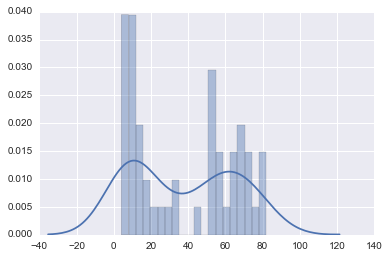

In [114]:
rate = sat.Rate.values

sns.distplot(rate, bins = 20)

##### 15. Plot the Math distribution

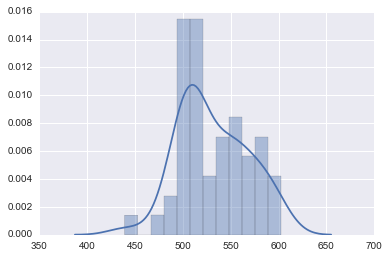

In [115]:
math = sat.Math.values

sns.distplot(math, bins = 12)

##### 16. Plot the Verbal distribution

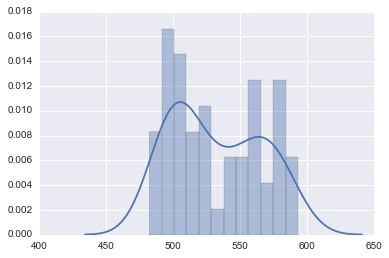

In [117]:
verbal = sat.Verbal.values

sns.distplot(verbal, bins = 12)


##### 17. What is the typical assumption for data distribution?

The typical assumption for data distribution is that is is a normal, unimodal distribution. 

##### 18. Does that distribution hold true for our data?

This does *not* hold true for our data. Our data 

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

##### 20. Are there any interesting relationships to note?

##### 21. Create box plots for each variable. 

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 